# IMPORT DATA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# DATA PREPROCESSING

### Missing data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We notice that all the columns are populated with data, there are no nulls

### Data Exploration

In [4]:
data.Gender.value_counts()/data.shape[0]

Female    0.56
Male      0.44
Name: Gender, dtype: float64

There are more female shoppers but not by much

In [5]:
age_percent = data.Age.value_counts()/data.shape[0]

print(f"Number of unique ages are: {age_percent.shape[0]}")
age_percent.sort_values(ascending = False).head(10)

Number of unique ages are: 51


32    0.055
35    0.045
19    0.040
31    0.040
30    0.035
49    0.035
40    0.030
36    0.030
23    0.030
38    0.030
Name: Age, dtype: float64

So we know there are 51 unique ages and the list about is the top 10 ages along with their percentage of how much they make up of the total. Looking at our top 10 age groups, we can see that 2 of them can be catagorized as young adults (19, 23). The rest can be catagorized as adults (in their 30-40's). The exception to this would be the age group 49, accounting for the top 6 common age group.

In [6]:
income = data.iloc[:, 3]
income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [7]:
spending_score = data.iloc[:, 4]
spending_score.describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

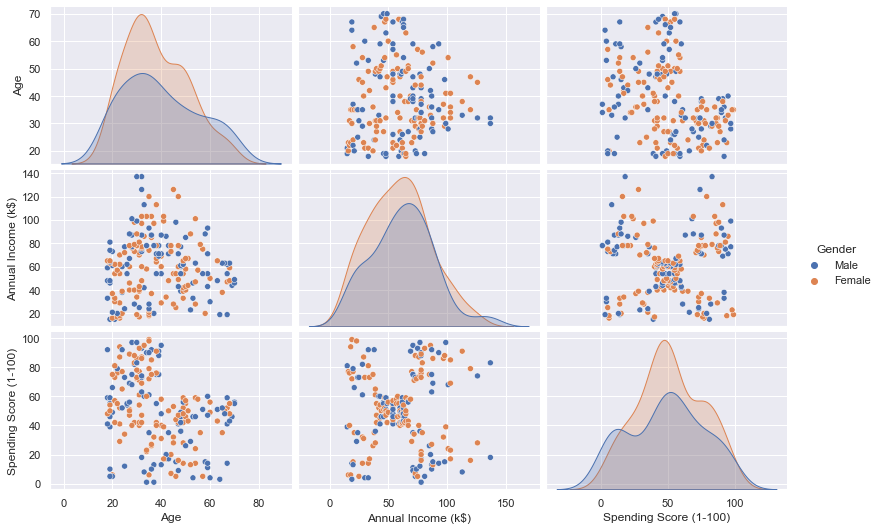

In [8]:
X = data.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

Looking at the graphs 3 things are clear:
- gender isn't important
- spending score and annual income seems to be the only realtionship worth looking into
- younger people have a higher spending score (19-40)

### Data encoding

In [9]:
# encode the "gender" column

from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Now all our data is numerical and when comparing with the second code cell we know that in the "Gender" column, 1 represents male and 0 represents female

# FEATURE SELECTION / ENGINEERING

There aren't a lot of features here plus from the graphs, it seems that spending score and annual income seems to show some promise.

The 2 features we will be using will be annual income and spending score. 
We would include age but the relationship was clearly discordered earlier.

In [10]:
X = pd.DataFrame(data.iloc[:,3:5])
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


We know that there are 2 catagorized we need to focus on when it comes to age (highly profitable (age 19-14) and pretty profitable (age 40-70)). What catagorized should we focus on when it comes to the luxury of the product? How much money do our costomers spend in our mall?

Text(0.5, 1.0, 'Annual Income vs Spending Score')

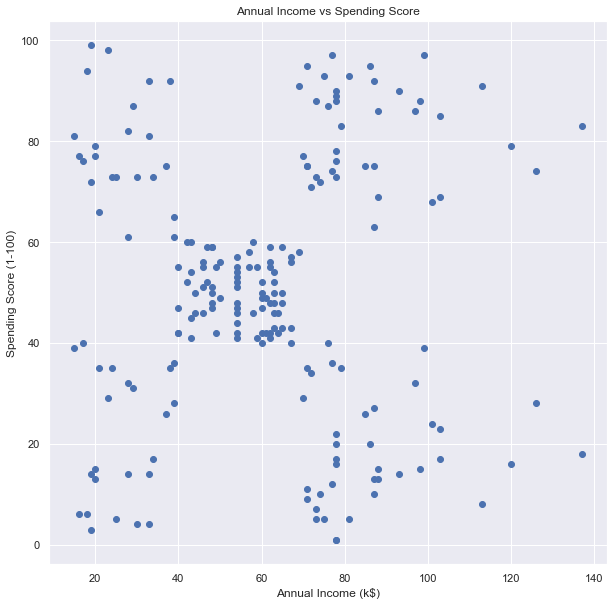

In [11]:
x = data.iloc[:, 3]
y = data.iloc[:, 4]

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Annual Income vs Spending Score")

# Model

I will be using both K-Means and Gaussian-Mixtures (GMM)

### K-Means

##### Silhouette analysis

When we look at the graph for annual income vs spending score, I can be hard to decide the most optimal number of clusters. In order to solve this problem, we use silhouette analysis. This analysis give us a sort of horizontal bar grapgh to the left and a visualization of the clustering on the right. While the image on the right is rather stright forward, the image on the left is a bit tricky. There are 2 main things to look for, bar thickness and the silhouette score. The thickness of the bar shows you the number of points in the cluster, so generally we want all the bars to be equally thick. The silhouette score is a value between -1 and 1. 

- +1 : sample is far away from the neighboring clusters
- 0 : sample is on or very close to the decision boundary between two neighboring clusters 
- -1 : samples might have been assigned to the wrong cluster

Ideally we want the score of 1.

Above we see the graph we are trying to cluster, it seems like 5 clusters will do the trick but we will find out soon.

In [12]:
#X_reshape = X.values.reshape(1, -1)
X.iloc[:, 0]

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3273163942500746
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5379675585622219
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4548653400650936
For n_clusters = 9 The average silhouette_score is : 0.4595491760122954
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869


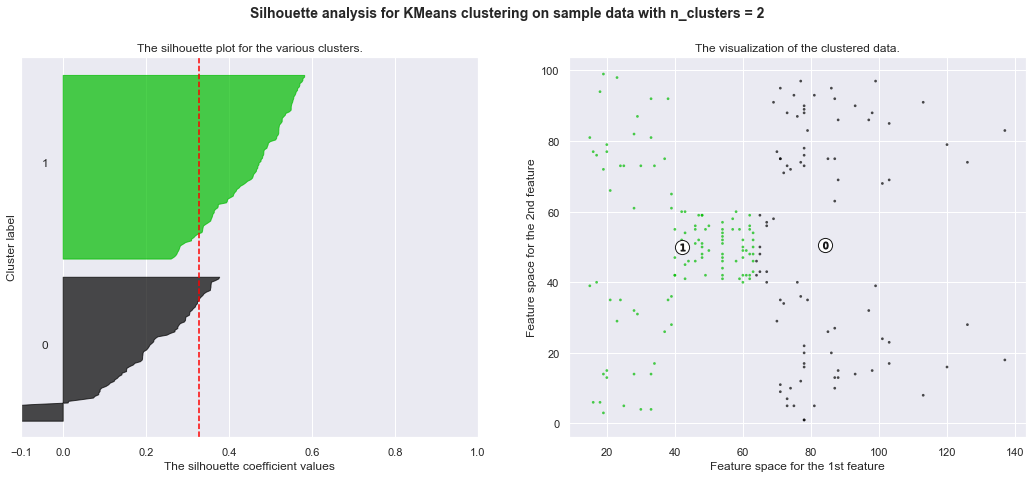

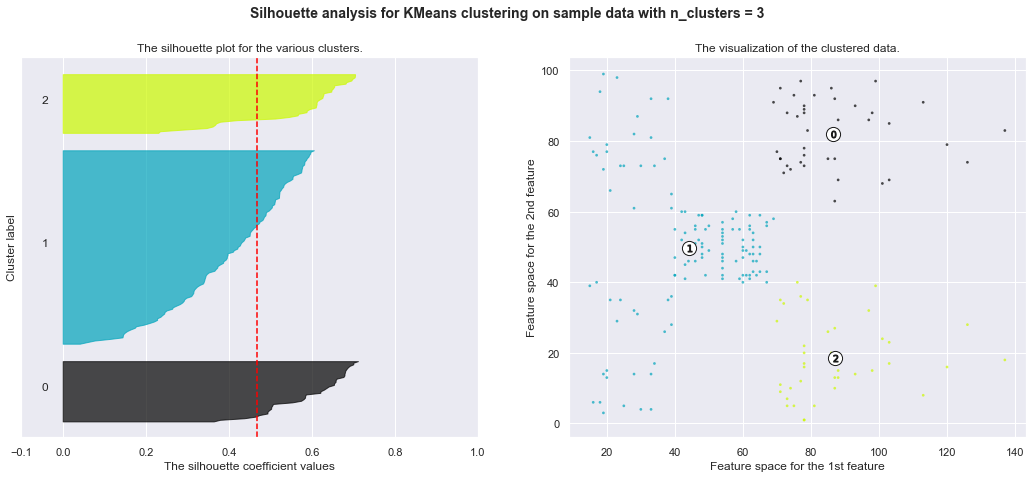

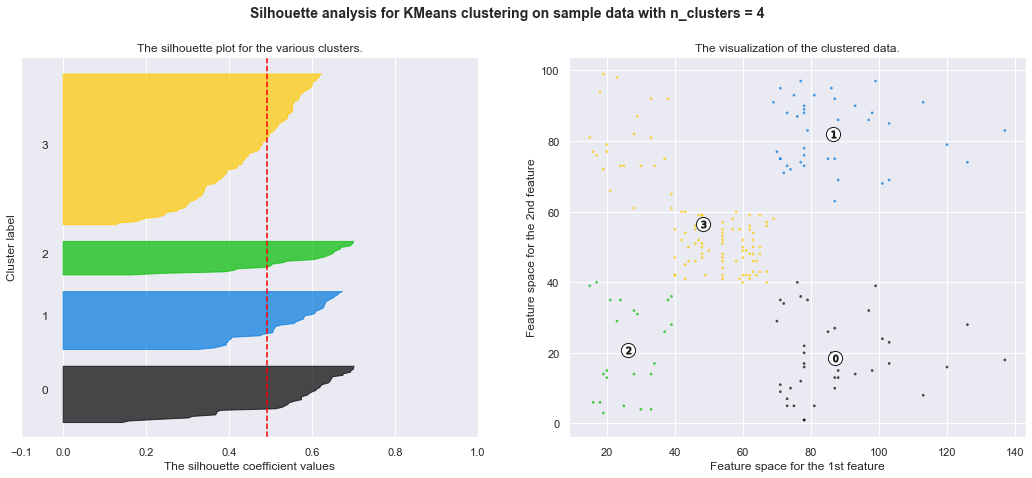

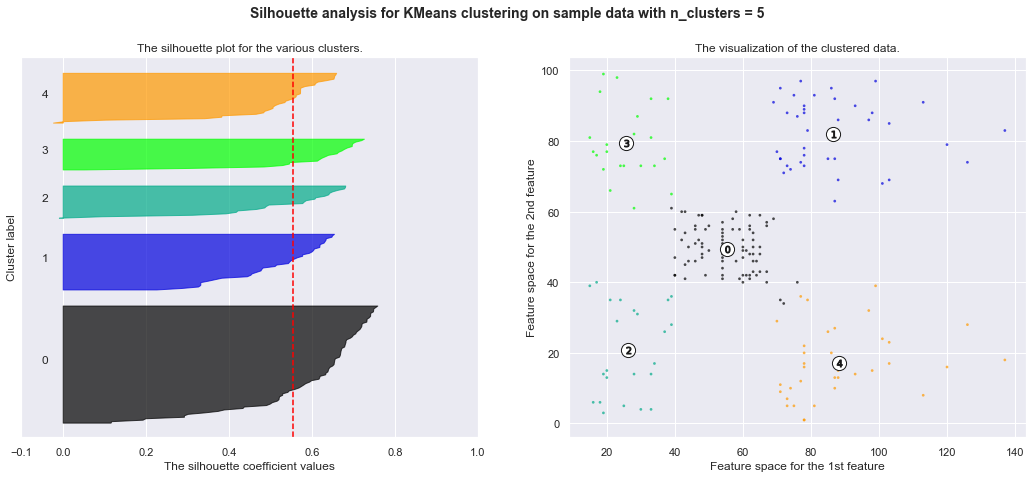

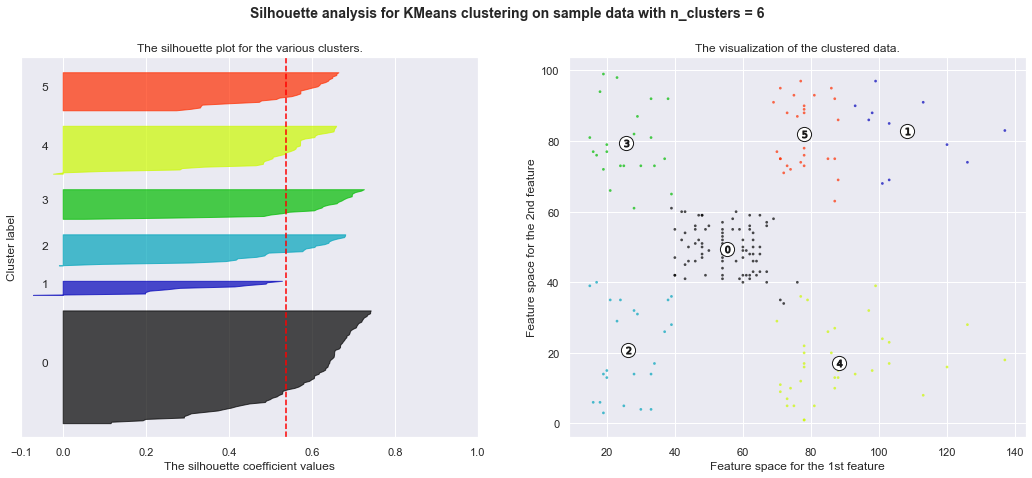

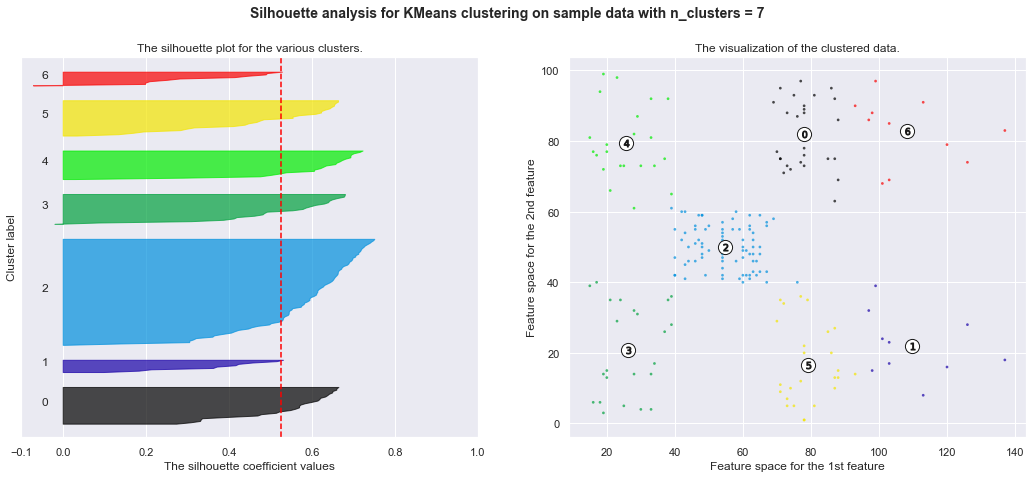

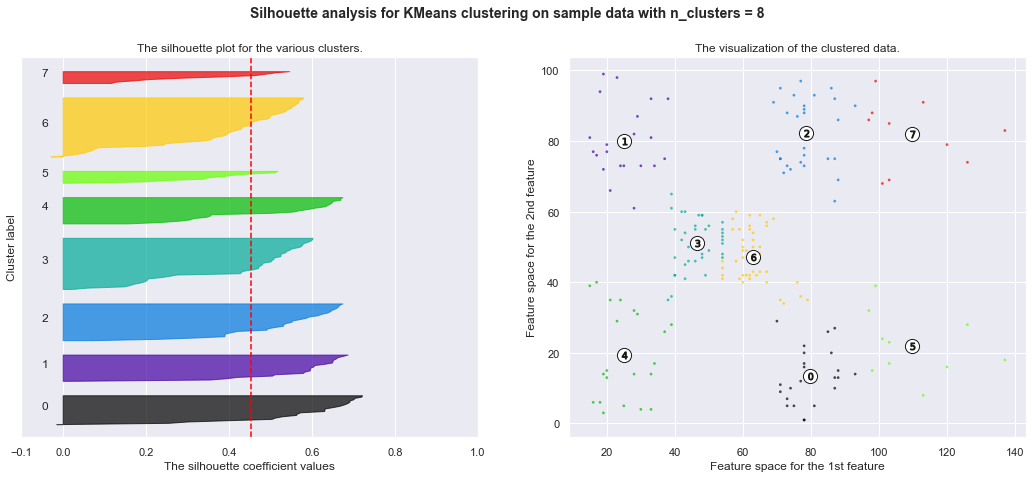

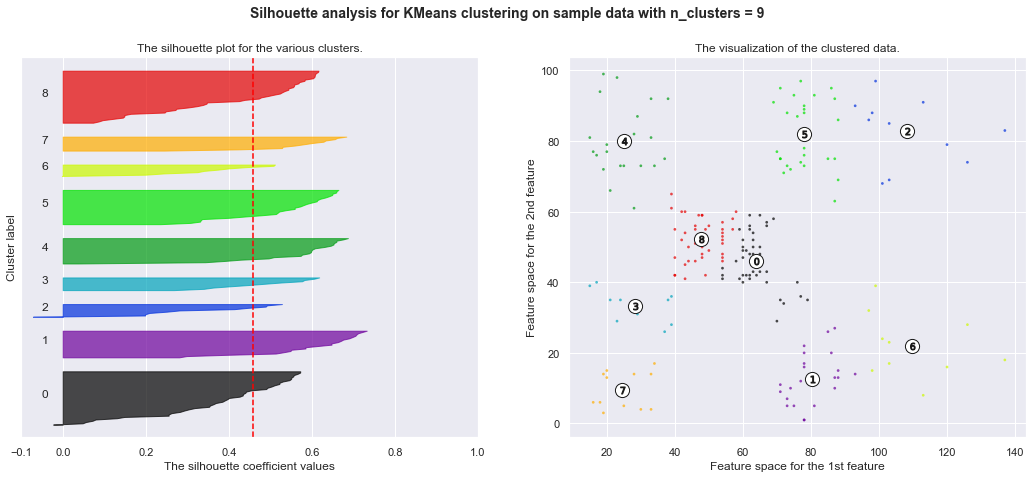

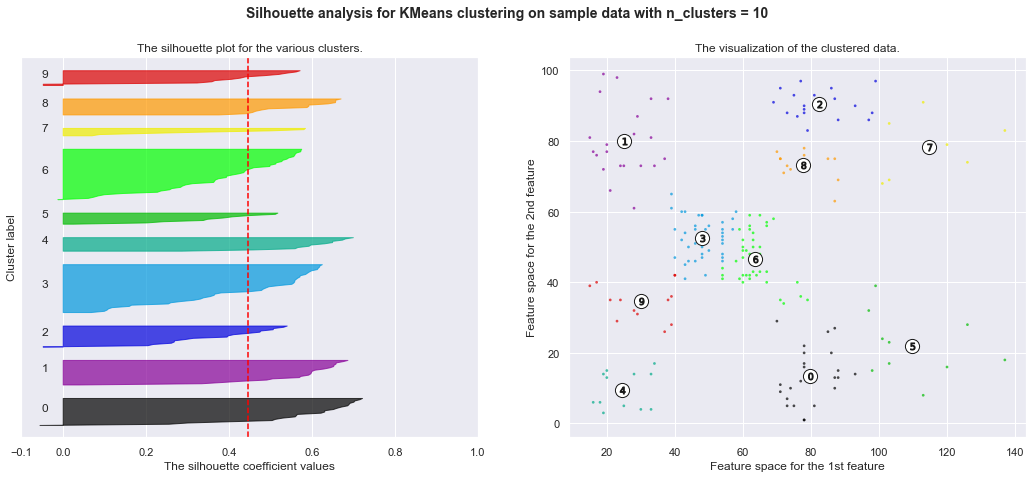

In [13]:
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

print(__doc__)

range_n_clusters = np.arange(2, 11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Looking at the silhouette score, clusters of 5 to 7 have a score above 0.5 however the visualization of clusters of 5 and 7 seem to be the most imformative. Due to this I will make a K-Means using both 5 and 7 clusters.

In [14]:
# get the radius of the clusters

from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

##### K-Mean: 5 clusters

Text(0.5, 1.0, 'Annual Income vs Spending Score with 5 cluster')

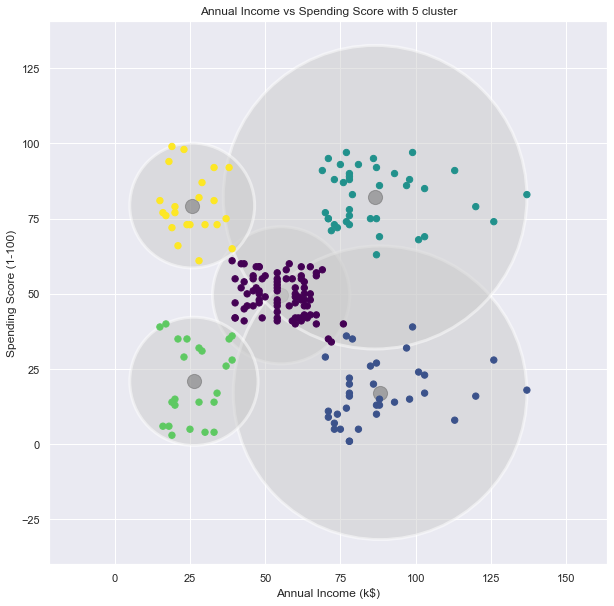

In [15]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(10,10))
plot_kmeans(kmeans, X, 5)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Annual Income vs Spending Score with 5 cluster")

Looking at this grapgh we understand that:
 - people who make around 40-70K a year tend to have a spending score between 40-60
 - people who make around 15-40K and 70-140K a year tend to have a spending score that is less than 40 or greater that 60  

##### K-Mean: 7 clusters

Text(0.5, 1.0, 'Annual Income vs Spending Score with 7 cluster')

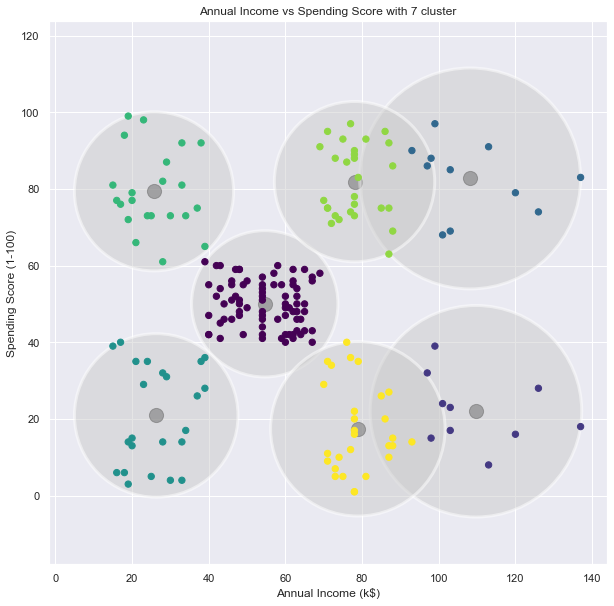

In [23]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(10,10))
plot_kmeans(kmeans, X, 7)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Annual Income vs Spending Score with 7 cluster")

Looking at this graph we understand that:
 - people who make around 40-70K a year tend to have a spending score between 40-60
 - people who make around 15-40K and 70-140K a year tend to have a spending score that is less than 40 or greater that 60 
 - we can afford to not focus too much on people who make more that 100K a year since there aren't a lot of people in these clusters
 - while each cluster with an income of less than 100K seem to be the same size, the purple cluster seems just as dense as the yellow and light green cluster combined. Similarly the purple cluster seems just as dense as the teal and green cluster combined
 
 - we can that in visually speaking, equal amounts of people shopping with incomes between 15-40K, 40-70K and 70-90K.
 - similarly we can say that we have equal amounts of people shopping with a shopping score between 0-40, 40-60 and 60-100.

While originally I thought 5 clusters would be good enough, 7 clusters seem to give more information.

### GMM

##### Optimal N clusters: AIC, BIC

Text(0.5, 1.0, 'GMM Optimal Clusters')

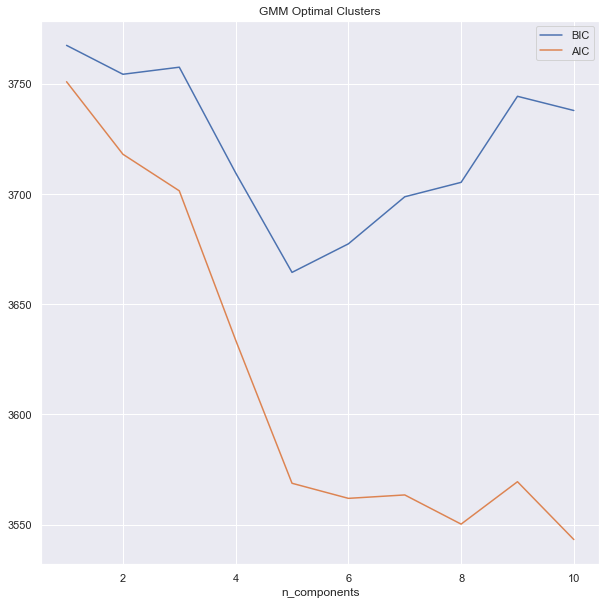

In [26]:
from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(1, 11)
models = [GMM(n).fit(X) for n in n_components]

plt.figure(figsize=(10,10))
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('GMM Optimal Clusters')

Looking at the GMM Optimal Clusters graph, both AIC and BIC recommend 5 clusters. However since 7 clusters for K-Means seemed more insightful and the AIC recommends 8 clusters, I will make 2 GMM models using 5 and 8 clusters.

In [20]:
# Visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    gmm = gmm.fit(X)
    labels = gmm.predict(X)
    if label:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w*w_factor)

##### GMM: 5 clusters

Text(0.5, 1.0, 'Annual Income vs Spending Score with 5 cluster')

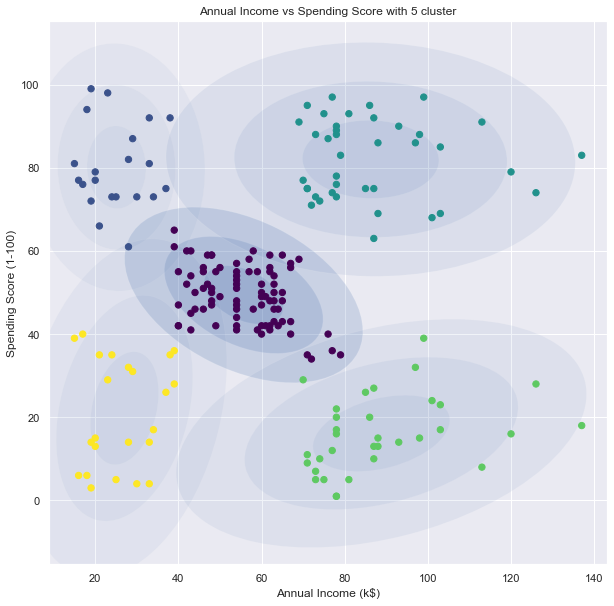

In [24]:
gmm = GMM(n_components=5)
plt.figure(figsize=(10,10))
plot_gmm(gmm, X)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Annual Income vs Spending Score with 5 cluster")

##### GMM: 7 clusters

Text(0.5, 1.0, 'Annual Income vs Spending Score with 7 cluster')

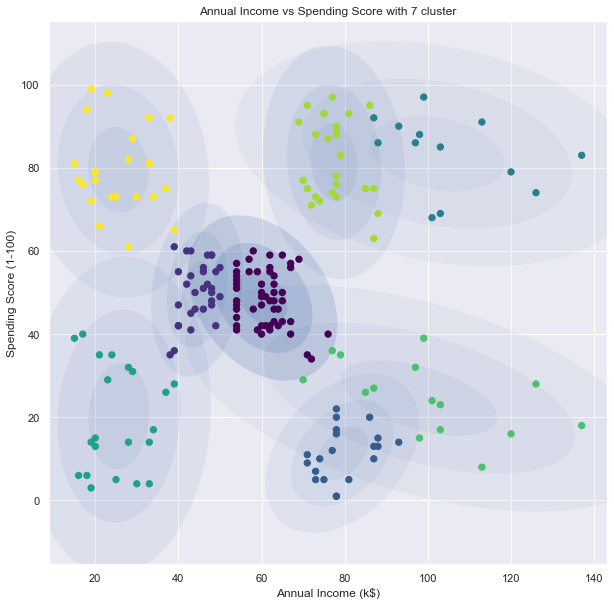

In [27]:
gmm = GMM(n_components=8)
plt.figure(figsize=(10,10))
plot_gmm(gmm, X)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Annual Income vs Spending Score with 7 cluster")

I prefer GMM with 5 clusters rather than GMM with 8 as the clusters more easily and just as accuratly translates to categories. While I prefer the visuals from the K-Means graphs, the GMM visuals show us a more accuray bounding box over our data. If we focus on the short and medium radius for each cluster, we can make some general rules by turning the radii into lines/vectors.

# Conclusion

Looking at each cluster from GMM with 5 clusters we can make the following assumptions/suggestions:

- blue:<br />
  low income, high spenders<br />
  vector: vertical<br />
  We should remember that this category spends alot of money, this means they are happy with what we have already.
  ______________________________
- yellow:<br />
  low income, low spenders<br />
  vector: vertical<br />
  This category either cannot find products of interest or cannot afford them, probably the former due to the blue cluster having the same income. The mall can either try incorperating new stores that does not sell expensive items or create targetted ads for this category.
  ______________________________
- purple:<br />
  mid income, mid spenders<br />
  vector: sloped down (m = -1)<br />
  This category already generates profits but not at a high rate. While this category has the lowest concerns, perhaps a rewards program may incentivize them to buy a bit more.
  ______________________________
  
- dark green:<br />
  high income, high spenders<br />
  vector: horizontal<br />
  We should remember that this category spends alot of money, this means they are happy with what we have already.
  ______________________________
- light green:<br />
  high income, low spenders<br />
  vector: sloped up (m = 0.4)<br />
  This category can afford expensive products but doesn't buy anything at our location. Perhaps the introduction of a popular luxurious brand into the mall may boost spending scores within this category. There are high income customers who spend alot so maybe by analysing them a bit more, we can incentivise this category
  ______________________________